### Evaluacion y Validacion del Modelo con datos de 2018

In [1]:
# Imports necesarios

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

from patsy import dmatrices
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
path_file = "C:/Users/Grios/Desktop/pipe/Proyecto/Correcciones/Apendice_G.xlsx"
dta = pd.read_excel(path_file)
df = pd.DataFrame(dta)

path_file_2018 = "C:/Users/Grios/Desktop/pipe/Proyecto/Correcciones/Apendice_I.xlsx"
dta_2018 = pd.read_excel(path_file_2018)
df_2018 = pd.DataFrame(dta_2018)

In [3]:
dta.drop(['PUBLICI','TOTAL_REM2','INVPRO','SERVEXT2'], axis=1, inplace=True)
dta

,ARRIENDO,SERVINT,TRANSP,TOTPERSO,CTO,VENTA
0,0.006629,0.005813,0.008565,0.001605,0.016319,0.420915
1,0.000261,0.000262,0.001022,0.001783,0.003807,0.455799
2,0.006629,0.005813,0.008565,0.001783,0.016319,0.284335
3,0.000104,0.000285,0.000121,0.001783,0.003423,0.447846
4,0.006629,0.005813,0.008565,0.001961,0.016319,0.407667
...,...,...,...,...,...,...
3625,0.000127,0.000866,0.000221,0.001783,0.000763,0.322389
3626,0.000010,0.000954,0.001325,0.002496,0.002143,0.409969
3627,0.000121,0.000537,0.008565,0.001783,0.002049,0.395980
3628,0.006629,0.004568,0.002951,0.026391,0.012081,0.584510


In [4]:
dta_2018.drop(['TOTAL_REM','INV_PRO','SERV_EXT'], axis=1, inplace=True)
dta_2018

,ARRIENDO,SERV_INT,TRANSP,TOT_PERSO,CTO,VENTA
0,8.860651e-03,0.000189,0.000803,0.002342,0.006278,0.578937
1,7.954228e-04,0.000421,0.000015,0.002577,0.000545,0.313346
2,8.860651e-03,0.000004,0.000001,0.000000,0.000490,0.684215
3,1.312818e-06,0.000520,0.000211,0.003279,0.000887,0.707881
4,2.067429e-08,0.002335,0.000031,0.011712,0.026781,0.762080
...,...,...,...,...,...,...
803,2.002409e-04,0.000009,0.000547,0.004919,0.001568,0.643329
804,1.188772e-06,0.000965,0.000279,0.001640,0.000040,0.701141
805,3.214853e-06,0.000033,0.000233,0.002577,0.003258,0.778979
806,8.434182e-04,0.000088,0.001154,0.007730,0.013579,0.737025


In [5]:
X = pd.DataFrame(dta.iloc[:,0:5].values)
print(X)
X = sm.add_constant(X)
y = dta.iloc[:,[5]]
print(y)

             0         1         2         3         4
0     0.006629  0.005813  0.008565  0.001605  0.016319
1     0.000261  0.000262  0.001022  0.001783  0.003807
2     0.006629  0.005813  0.008565  0.001783  0.016319
3     0.000104  0.000285  0.000121  0.001783  0.003423
4     0.006629  0.005813  0.008565  0.001961  0.016319
...        ...       ...       ...       ...       ...
3625  0.000127  0.000866  0.000221  0.001783  0.000763
3626  0.000010  0.000954  0.001325  0.002496  0.002143
3627  0.000121  0.000537  0.008565  0.001783  0.002049
3628  0.006629  0.004568  0.002951  0.026391  0.012081
3629  0.000241  0.000285  0.000086  0.001605  0.000999

[3630 rows x 5 columns]
         VENTA
0     0.420915
1     0.455799
2     0.284335
3     0.447846
4     0.407667
...        ...
3625  0.322389
3626  0.409969
3627  0.395980
3628  0.584510
3629  0.326728

[3630 rows x 1 columns]


In [6]:
XX = pd.DataFrame(dta_2018.iloc[:,0:5].values)
print(XX)
XX = sm.add_constant(XX)
yy = dta_2018.iloc[:,[5]]
print(yy)

                0         1         2         3         4
0    8.860651e-03  0.000189  0.000803  0.002342  0.006278
1    7.954228e-04  0.000421  0.000015  0.002577  0.000545
2    8.860651e-03  0.000004  0.000001  0.000000  0.000490
3    1.312818e-06  0.000520  0.000211  0.003279  0.000887
4    2.067429e-08  0.002335  0.000031  0.011712  0.026781
..            ...       ...       ...       ...       ...
803  2.002409e-04  0.000009  0.000547  0.004919  0.001568
804  1.188772e-06  0.000965  0.000279  0.001640  0.000040
805  3.214853e-06  0.000033  0.000233  0.002577  0.003258
806  8.434182e-04  0.000088  0.001154  0.007730  0.013579
807  4.920482e-06  0.000162  0.003404  0.010307  0.001483

[808 rows x 5 columns]
        VENTA
0    0.578937
1    0.313346
2    0.684215
3    0.707881
4    0.762080
..        ...
803  0.643329
804  0.701141
805  0.778979
806  0.737025
807  0.347389

[808 rows x 1 columns]


### Modelamiento por StatsModels (OLS Regression)

In [7]:
mod_ols = sm.OLS(y, X)
res_ols = mod_ols.fit()
print(res_ols.summary())

y_pred_o = res_ols.predict(X)
error_o = np.sqrt(mean_squared_error(y, y_pred_o))
print('Error: ', error_o)
print('R2: ', res_ols.rsquared,"\n")

y_pred_o2 = res_ols.predict(XX)
error_o2 = np.sqrt(mean_squared_error(yy, y_pred_o2))
r2 = r2_score(yy,y_pred_o2)

print("Datos del predict")
print('Error: ', error_o2)
print('R^2: ',r2)

                            OLS Regression Results                            
Dep. Variable:                  VENTA   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     591.6
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:34:08   Log-Likelihood:                 3806.6
No. Observations:                3630   AIC:                            -7601.
Df Residuals:                    3624   BIC:                            -7564.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4663      0.002    278.218      0.0

<AxesSubplot:xlabel='VENTA'>

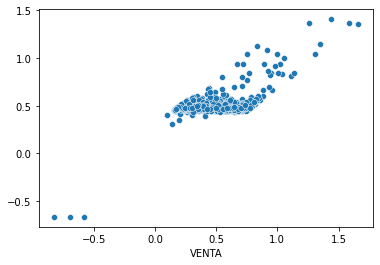

In [8]:
sns.scatterplot(x="VENTA", y=res_ols.predict(XX), data=dta_2018, palette="viridis")

### Modelamiento por Sklearn (LinearRegression)

In [9]:
reg = LinearRegression()
reg = reg.fit(X, y)

y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
r2 = reg.score(X, y)

print("El error es: ", error)
print("El valor de r^2 es: ", r2)
print("Los coeficientes son: ", reg.coef_)

El error es:  0.084787918340191
El valor de r^2 es:  0.44940113650994296
Los coeficientes son:  [[ 0.         -2.56617086 -0.16929412 -1.38306497  3.27714394  1.41416233]]


In [10]:
y_pred2 = reg.predict(XX)
error2 = np.sqrt(mean_squared_error(yy, y_pred2))
r22 = reg.score(XX, yy)
print("El error es: ", error2)
print("El valor de r^2 es: ", r22)

El error es:  0.1746325704256378
El valor de r^2 es:  0.35240435734464715
